In [11]:
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Reading the data

In [12]:
data = pd.read_csv('data/reviews_2.csv')

## Counts of rows and columns

In [13]:
data.shape

(16923, 2)

## Checking for nans/nulls

In [14]:
data.isna().sum()

text      1
label    13
dtype: int64

In [15]:
data[data['label'].isna()]

,text,label
10658,I am a huge fan of south indian cuisine. So fi...,NaN
10659,Highs:,NaN
10660,•Food tasted good.,NaN
10661,•Easy to locate ( city centre 2 hangout).,NaN
10662,•Only south indian food joint at hangout.,NaN
10663,Lows:,NaN
10664,•I found it highly overpriced (disappointed).,NaN
10665,•A masala dosa (a staple food in South India) ...,NaN
11650,a pure bengali feeling....inside the restauran...,NaN
12609,This is a street food joint located at a few m...,NaN


In [16]:
data[data['text'].isna()]

,text,label
7165,NaN,1.0


## Bidding them good bye

In [17]:
data = data.dropna().reset_index(drop=True)

In [18]:
data.shape

(16909, 2)

## Analysing article lenghts

In [19]:
data['text'].apply(len).describe()

count    16909.000000
mean       333.618073
std        210.399478
min          1.000000
25%        180.000000
50%        274.000000
75%        441.000000
max       1080.000000
Name: text, dtype: float64

## Because a picture is worth a 1000 words

(-50, 1500)

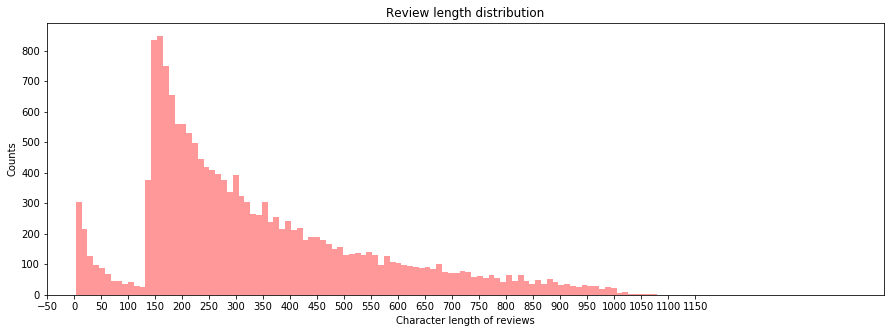

In [32]:
text_lens = data['text'].apply(len).values
fig = plt.figure()
fig.set_size_inches(15, 5)
g = sns.distplot(text_lens, kde=False, bins=100, color='red')
g.set_xlabel('Character length of reviews')
g.set_ylabel('Counts')
g.set_xticks(np.arange(-50, 1200, 50))
g.set_title('Review length distribution')
g.set_xlim(-50, 1500)

## Manually checking out the smaller articles ...

In [21]:
(text_lens <= 2).sum()

14

In [25]:
data[text_lens <= 2]['text']
# data[text_lens <= 2]

6916     ok
10983    ok
11899     3
12176     👍
12238     k
12541    ok
13020    ok
14350     1
14385    ok
15035    OK
15172    ok
15385     4
15807    OK
16038     v
Name: text, dtype: object

## ... and the longer ones

In [26]:
(text_lens > 1000).sum()

35

In [27]:
data[text_lens > 1000]['text']

57       Been to Ozora twice and this is one of the bea...
374      #bhukkadbroadminreview\r\n\r\nHello guys!!Few ...
430      This outlet of Aliah is right at the Park Circ...
967      Situated near the Maddox Square, in fact, righ...
1157     Dum Laga K Haishaa is a musically themed resta...
1670     #25thDecember\r\n\r\n#ChristmasDiaries\r\n\r\n...
1791     Located at Southern Avenue, The Wall is famous...
2334     Basically this restaurant is serving authentic...
2576     Blu Orchid is a takeaway joint in Ajoynagar se...
2616     Anokha baghicha was previously known as tandoo...
3103     It happens 1 out of 10 when i give a place thi...
3235     We live at Barasat. So Grillhub is very near t...
3502     Pandal hopping? Got hungry? Craving for some d...
4474     A place where I used to visit until quite a fe...
4614     Initially I was skeptical about this place. Ma...
4653     After ordering and reordering food from here o...
4714     Location: Near Webel Bhawan, Sector 5.\r\n\r\n.

## Dropping the smaller articles

In [28]:
data = data[text_lens > 2].reset_index(drop=True)

## Now the ratings

In [29]:
label_counts = Counter(data['label'].values)
label_counts.most_common()

[(4.0, 5410),
 (5.0, 3917),
 (3.0, 3475),
 (1.0, 1673),
 (2.0, 1012),
 (3.5, 677),
 (4.5, 337),
 (2.5, 280),
 (1.5, 114)]

## Major class imbalance noticed, but let's talk in %

In [30]:
label_counts = {k: (v/data.shape[0])*100 for k, v in label_counts.items()}

In [31]:
label_counts

{5.0: 23.18437407517017,
 4.0: 32.02130807931341,
 3.0: 20.568215448357503,
 2.0: 5.989937851435336,
 1.0: 9.902337969813555,
 4.5: 1.9946729801716485,
 3.5: 4.007102693104469,
 2.5: 1.6572950577093812,
 1.5: 0.6747558449245339}

## Displying some of the examples from the _'ambiguous'_ class

In [19]:
data[data['label'] == 3]['text'].values[0]

"Well had been to this place a while back to attend an event. Really loved the banquet space on offer. The open area is a real show stopper. The food is good here. The starters on offer are pretty innovative and tasty. Really enjoyed the mini pizzas and fried chicken ala Kiev though it wasn't really the dish. Simply fried chicken with a tangy dip anyhow does the trick. The Dal makhni tart was innovate. However the Dal makes the casings soft and kills the fun. Food is decent here. Liked the chicken mughlai dish on offer. Need to work on their fish dishes.they use basa which is a tastless fish basically. needs stronger flavours to tingle the palate."

In [20]:
data[data['label'] == 3]['text'].values[10]

'Ordered 3 biriyani taste was good.\nBut quantity was not enough for one people.\nDelivery was fast.\nI got the order within 15min.\n\nThey should increase their quantity.'

In [21]:
data[data['label'] == 3]['text'].values[-1]

'Little expensive, ambience is good. \nTaste is not great! \nService is fine. \nChutney is stale, dosa tastes better. \nI thought rasgulla would taste good but this is the worst rasgulla I’ve ever tasted.'

In [22]:
data[data['label'] == 4]['text'].values[0]

'The best one till date existing amongst all the buffets in kolkata.has been there almost 4-5times.the live grill session is not an unknown thing to Calcuttans.i would like to emphasis about the Greek festival which was on.\nFood was great,the live Malpoa session could have been a bit better.'

In [23]:
data[data['label'] == 4]['text'].values[20]

'It has been a wonderful Sunday lunch at this joint. Above all, Aliah Restaurant is celebrating Biryani festival at Kolkata and being a Bong, how can i missed that chance to not celebrating this awesome auspicious festival of Biryani.\nNow something about the food,\nThey made such a delightful Biryani at this festival too. But all were not available, but they serve quite range of them.\nIt was a pleasure to being there. They serve Tikka Biryani, Hyderabadi Biryani, kachhi biryani, special chicken biryani.\nAll of were having an awesome essence of aroma of there genre.\nWith all I request aliah restaurant to celebrate this festival again'

In [24]:
data[data['label'] == 4]['text'].values[-1]

'I have always been a fan of the egg roll served here..I have eaten the double egg chicken roll a multiple time and ut is totally awesome..I have also eaten mutton biriyani from here..It was also very good...😊😊😊'

## Converting the labels to _'positive'_ and _'negative'_ binary labels

In [26]:
def label_map(lbl: float) -> str:
    if lbl >= 4:
        return 'positive'
    else:
        return 'negative'

In [27]:
data['class'] = data['label'].apply(label_map)

In [28]:
label_counts = Counter(data['class'].values)
label_counts.most_common()

[('positive', 7326), ('negative', 4088)]

In [29]:
data.head()

,text,label,class
0,A class service!\nFood was as always delicious...,5.0,positive
1,What more to say about a place that we keep on...,4.5,positive
2,Absolutely loved this place. They deserve ever...,5.0,positive
3,When I hear buffet this name pops up in my bra...,5.0,positive
4,Probably the most famed restaurant in town. Lo...,5.0,positive


In [30]:
data.shape

(11414, 3)

In [31]:
data.drop('label', axis=1, inplace=True)

## Spltting the data into train, validation and test sets

In [32]:
# 80% for train
train = data.sample(frac=0.8)
data.drop(train.index, axis=0, inplace=True)

# 10% for validation
valid = data.sample(frac=0.5)
data.drop(valid.index, axis=0, inplace=True)

# 10% for test
test = data

In [33]:
train.shape

(9131, 2)

In [34]:
train.head()

,text,class
3106,"I ordered a biryani, and the taste of the Biry...",positive
1927,A nice place to hangout since it has both the ...,positive
5405,This place is awesome for having lunch or dinn...,positive
7426,I got shell of egg in the egg roll. as a resul...,negative
1669,"Their biryani is oily, with a bit disconcertin...",negative


In [35]:
valid.shape

(1142, 2)

In [36]:
valid.head()

,text,class
5373,The food was excellent with surplus quantity. ...,positive
7754,This place nearer to the Gitanjali metro stati...,positive
11134,Ordered for Aloo tikki with choley just now @0...,negative
365,Hatari is one of those restaurants that our fa...,positive
8021,Disappointing.......\nThey have altered the ta...,negative


In [37]:
test.shape

(1141, 2)

In [38]:
test.head()

,text,class
24,This place is amazing. I think the best place ...,positive
25,This place has been on my list for quite some ...,positive
37,What a wonderful cold winter evening it was. M...,positive
49,BabBQ had always been a personal favorite when...,positive
60,Know for its Deep Dish Pizza this place is sur...,negative


## Finally, saving to disk

In [39]:
train.to_csv('data/train.csv')
valid.to_csv('data/valid.csv')
test.to_csv('data/test.csv')